In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import roc_curve, auc
%matplotlib inline

In [9]:
df = pd.read_csv("cancer.csv")
X = df.drop("label", axis = 1).values
y = df["label"].values

#разделяем датасет на обучающую и тестовую выборку
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0)

Дерево решений

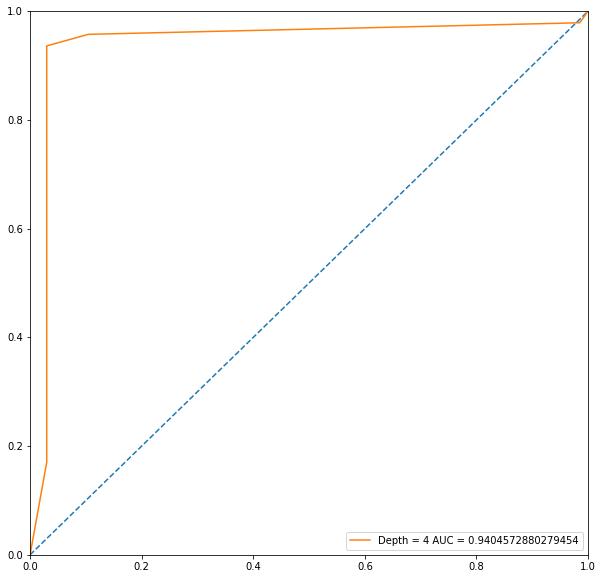

In [10]:
tree = DecisionTreeClassifier(max_depth = 4)
tree.fit(X_train, y_train)

#считаем вероятность второго класса
y_proba = tree.predict_proba(X_test)[:,1]

#roc_curve выдает fpr, tpr и threshold, последнее нам не нужно
fpr, tpr, _ = roc_curve(y_test, y_proba, pos_label = 'M')
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10,10))
plt.plot([0, 1], [0, 1], "--")    

plt.xlim(0,1)
plt.ylim(0,1)

plt.plot(fpr,tpr, label="Depth = " + str(tree.max_depth) + " AUC = " + str(roc_auc))

plt.legend(loc = "lower right")
plt.show()

# Задание

1) Выведите ROC кривые и AUC для дерева решений на датасете spam.

2) То же самое, только для случайного леса в 50 деревьев.

3) То же самое, только для catboost.

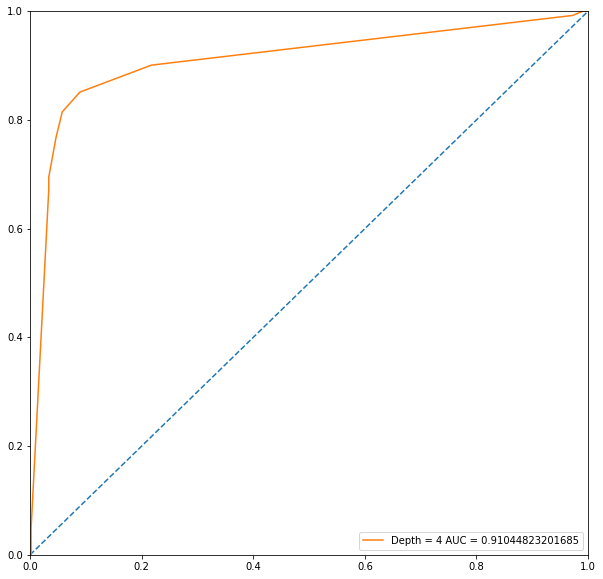

In [11]:
df = pd.read_csv("spam.csv")
X = df.drop("label", axis = 1).values
y = df["label"].values

#разделяем датасет на обучающую и тестовую выборку
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0)
tree = DecisionTreeClassifier(max_depth = 4)
tree.fit(X_train, y_train)

#считаем вероятность второго класса
y_proba = tree.predict_proba(X_test)[:,1]

#roc_curve выдает fpr, tpr и threshold, последнее нам не нужно
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10,10))
plt.plot([0, 1], [0, 1], "--")    

plt.xlim(0,1)
plt.ylim(0,1)

plt.plot(fpr,tpr, label="Depth = " + str(tree.max_depth) + " AUC = " + str(roc_auc))

plt.legend(loc = "lower right")
plt.show()

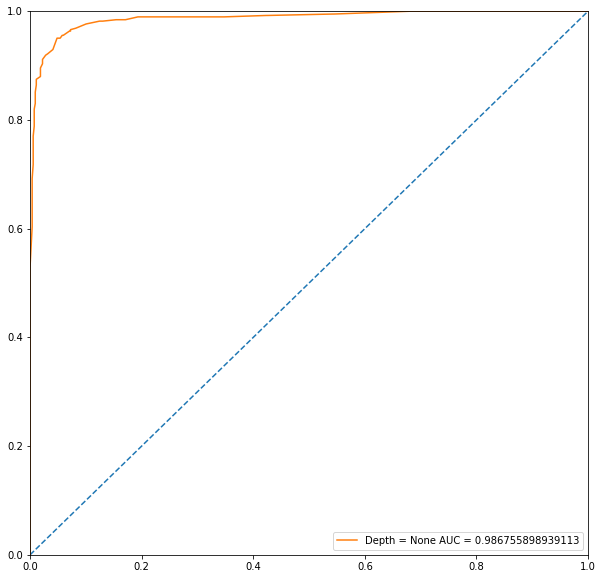

In [12]:
X = df.drop("label", axis = 1).values
y = df["label"].values

#разделяем датасет на обучающую и тестовую выборку
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0)
tree = RandomForestClassifier(n_estimators = 50)
tree.fit(X_train, y_train)

#считаем вероятность второго класса
y_proba = tree.predict_proba(X_test)[:,1]

#roc_curve выдает fpr, tpr и threshold, последнее нам не нужно
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10,10))
plt.plot([0, 1], [0, 1], "--")    

plt.xlim(0,1)
plt.ylim(0,1)

plt.plot(fpr,tpr, label="Depth = " + str(tree.max_depth) + " AUC = " + str(roc_auc))

plt.legend(loc = "lower right")
plt.show()

In [13]:
import catboost

In [15]:
from catboost import CatBoostClassifier, Pool

In [17]:
treecat = CatBoostClassifier(num_trees=50)
test_data = catboost_pool = Pool(X_test, y_test)

Learning rate set to 0.236171
0:	learn: 0.4989760	total: 8.82ms	remaining: 432ms
1:	learn: 0.3879160	total: 18ms	remaining: 433ms
2:	learn: 0.3280777	total: 26.8ms	remaining: 420ms
3:	learn: 0.2630816	total: 33.8ms	remaining: 389ms
4:	learn: 0.2407029	total: 40.7ms	remaining: 366ms
5:	learn: 0.2230867	total: 47.1ms	remaining: 346ms
6:	learn: 0.2047555	total: 53.9ms	remaining: 331ms
7:	learn: 0.1950252	total: 61.1ms	remaining: 321ms
8:	learn: 0.1790726	total: 68ms	remaining: 310ms
9:	learn: 0.1699870	total: 75.1ms	remaining: 300ms
10:	learn: 0.1658000	total: 82.3ms	remaining: 292ms
11:	learn: 0.1631252	total: 88.8ms	remaining: 281ms
12:	learn: 0.1574968	total: 94.3ms	remaining: 268ms
13:	learn: 0.1527858	total: 102ms	remaining: 261ms
14:	learn: 0.1491032	total: 108ms	remaining: 252ms
15:	learn: 0.1438936	total: 114ms	remaining: 243ms
16:	learn: 0.1404122	total: 121ms	remaining: 235ms
17:	learn: 0.1359746	total: 127ms	remaining: 225ms
18:	learn: 0.1309362	total: 133ms	remaining: 218ms
19

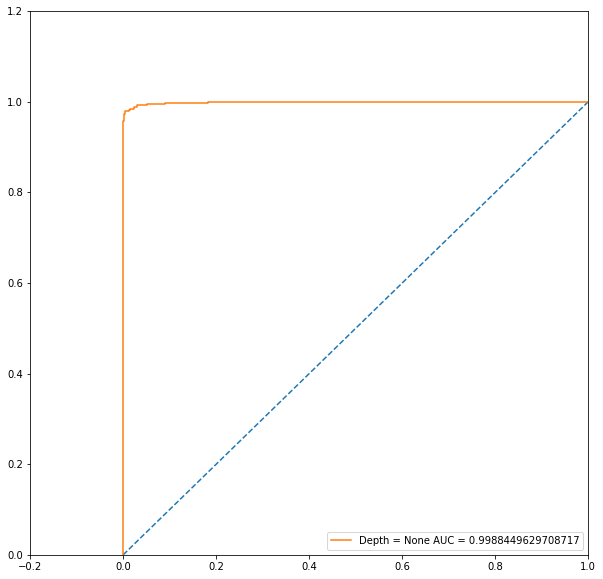

In [24]:
treecat.fit(X_test, y_test)
y_proba = treecat.predict_proba(X_test)[:,1]
#roc_curve выдает fpr, tpr и threshold, последнее нам не нужно
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10,10))
plt.plot([0, 1], [0, 1], "--")    

plt.xlim(-0.2,1)
plt.ylim(0,1.2)

plt.plot(fpr,tpr, label="Depth = " + str(tree.max_depth) + " AUC = " + str(roc_auc))

plt.legend(loc = "lower right")
plt.show()